In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
# Add parent dir to path, so that python finds the lenskit package
sys.path.insert(0,parentdir)

In [3]:
from lenskit.metrics import topnFair
from lenskit.metrics import dataGenerator
from lenskit import runSyntheticExp
#from lenskit import runSyntheticExp_equal_ex
#from lenskit import runSyntheticExp_ndAPCR
#from lenskit import runSyntheticExp_ndAPCR1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
runSyntheticExp.main(1000,500,"rND", 3, "runSExp_rND_log2_cut3")
#runSExp_rKL_expo_cut10

[500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699,

In [15]:
#runSyntheticExp_ndAPCR.main(1000,500,"rND",10,"runSExp_nd_APCR_EXPO")
[i/10 for i in range(10)] 

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [34]:
NORM_ITERATION=50 # max iterations used in normalizer computation

In [42]:
def main(_user_N,_pro_N,_gfmeasure,_cut_point,_rez_fn,_norm_iteration=10):

    """
        Run the group fairness experiments of synthetic unfair rankings.
        Output group fairness results as csv file.        
        
        :param _user_N: The total user number of input ranking
        :param _pro_N: The size of protected group in the input ranking        
        :param _gfmeassure: The group fairness measure to be used in calculation 
                            one of "rKL", "rND" and "rRD" defined as constant in this py file 
        :param _cut_point: The cut off point of set-wise group fairness calculation               
        :param _rez_fn: The file name to output group fairness results
        :param _norm_iteration: max iterations used in normalizer computation 
        
        :return: no returns.
    """
    # define the input mixing proportion
    f_probs=[i/10 for i in range(10)] 
    f_probs.append(0.98) #using 0.98 as extreme case considering the limitation of random generator
    

    #define output file
    #output_fn=_rez_fn+"_user"+str(_user_N)+"_pro"+str(_pro_N)+".csv"
    #with open(output_fn,'w') as mf:
    #    mf.write("MP0.0,MP0.1,MP0.2,MP0.3,MP0.4,MP0.5,MP0.6,MP0.7,MP0.8,MP0.9,MP0.98\n")        
    #rez_file=open(output_fn, 'a')
    # calculate the normalizer of the input user number and protected group
    max_GF= topnFair.getNormalizer(_user_N,_pro_N,_gfmeasure) 
    print ("max_GF : "  , max_GF)
    # generate a random input ranking and protected group
    input_ranking=[x for x in range(_user_N)]
    sensi_idx=[x for x in range(_pro_N)]
    
    gf_results=[]  
    # loop the input fairness probabilities
    for fpi in range(len(f_probs)): 
        fp=f_probs[fpi]
        gf_iters= [] 
        for iteri in range(1,_norm_iteration+1):
            sRFair=dataGenerator.generateUnfairRanking(input_ranking,sensi_idx,fp)                   
            gf=topnFair.calculateNDFairnessPara(sRFair,sensi_idx,_cut_point,_gfmeasure, max_GF, len(sRFair), len(sensi_idx))  
            gf_iters.append(gf) 
        gf_results.append(gf_iters) #record average result
        print ("Finished mixing proportion ",fp)
    print (np.array(gf_results))   
    return gf_results
    

In [43]:
result1 = main(1000,500,"rND", 10, "runSExp_rND_log2_cut3",100)

max_GF :  0.31402613069651475
Finished mixing proportion  0.0
Finished mixing proportion  0.1
Finished mixing proportion  0.2
Finished mixing proportion  0.3
Finished mixing proportion  0.4
Finished mixing proportion  0.5
Finished mixing proportion  0.6
Finished mixing proportion  0.7
Finished mixing proportion  0.8
Finished mixing proportion  0.9
Finished mixing proportion  0.98
[[1.         1.         1.         ... 1.         1.         1.        ]
 [0.80065045 0.95489521 0.6676749  ... 0.72052081 0.77977952 0.80310637]
 [0.59711481 0.52255367 0.8234337  ... 0.43028477 0.75524146 0.90169477]
 ...
 [0.60417056 0.56222104 0.5435379  ... 0.39333939 0.7816093  0.46054806]
 [0.60107286 0.52133196 0.67417722 ... 0.66245787 0.93314029 0.7656726 ]
 [0.99999868 0.9991951  1.         ... 1.         0.99134397 0.96419748]]


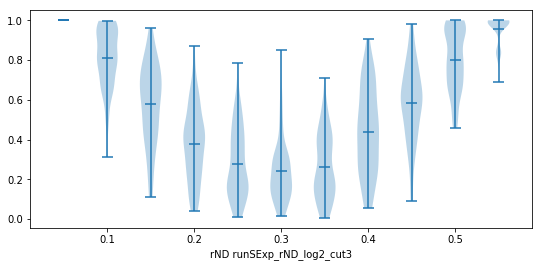

In [53]:
x=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.98]
#y = np.array(result1).transpose()
# Reproducibility
np.random.seed(42)

all_data = result1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4), sharey=True)

plt.violinplot(all_data, showmeans=True, showmedians=False)
ax.set_xticklabels(x)
ax.set_xlabel('rND runSExp_rND_log2_cut3')

plt.show()


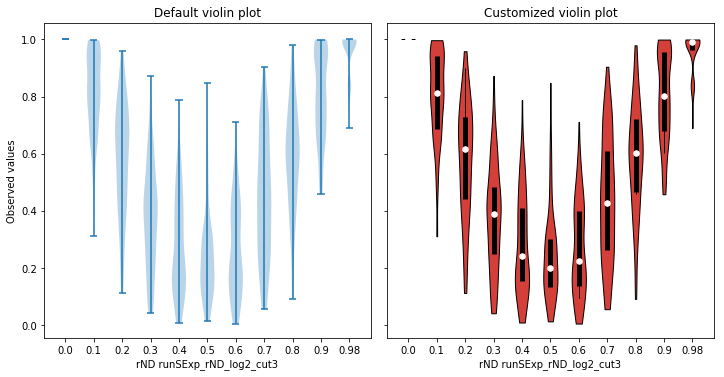

In [55]:
data = result1

def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('rND runSExp_rND_log2_cut3')
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)

for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)

# set style for the axes
labels = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.98]
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)

plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

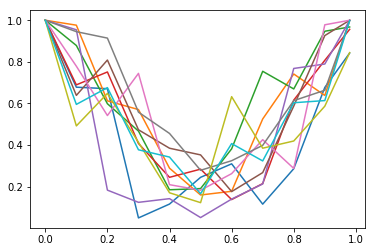

In [23]:
for each_array in y:
    plt.plot(x, each_array)

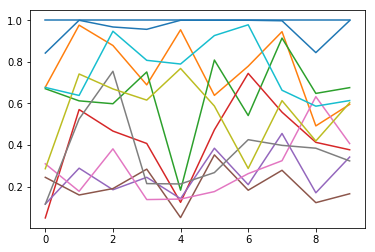

In [24]:
x1 = range(10)
y1 = np.array(result1)
for each_array in y1:
    plt.plot(x1, each_array)

In [ ]:
x=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.98]
plt.plot(x, rnd_expo, color='g', label= "rND_expo")
#plt.plot(x, rnd_expoTop50, color='red', label= "rND_expo50")
plt.plot(x, rnd_log2, color='orange', label = "rnd_log2")
#plt.plot(x, rnd_expo200af1000, color='blue', label = "expo 200/1000")
#plt.plot(x, rnd_log2_200af1000, color='red', label = "log2 200/1000")


plt.legend(loc='upper center')
plt.xlabel('f')
plt.ylabel('rND')
#plt.title('rND discount experiments')
plt.show()

In [67]:
pd.concat(result1, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.98])

TypeError: cannot concatenate object of type "<class 'list'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

<function matplotlib.pyplot.show(*args, **kw)>

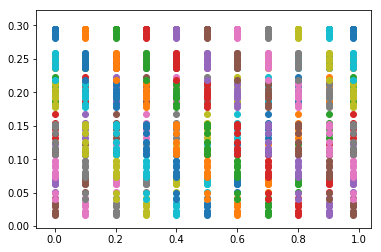

In [63]:
results.set
xax = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.98])

for row in result1:
    for x in xax:
        b= np.full((1, 10), x)
        #print(b)
        plt.scatter(b, row) 


plt.show

ValueError: x and y must be the same size

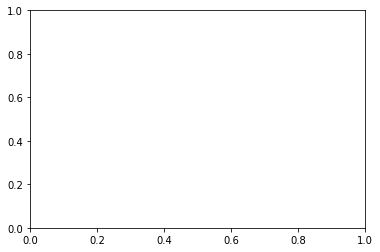

In [41]:
plt.scatter(x, result) 

array([[1, 2, 3],
       [4, 5, 6]])